In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Preprocessing data

In [8]:
data_c = pd.read_parquet('./Local/2017_Clean/Combined.parquet')
data_f1 = pd.read_parquet('./Local/2017_Final/Combined_1.parquet')
data_f2 = pd.read_parquet('./Local/2017_Final/Combined_2.parquet')

datasets = {'Clean data': data_c, 'Final data 1': data_f1, 'Final data 2': data_f2}

In [21]:
def preprocess_data(df):
    label_encoder = LabelEncoder()
    
    if 'Label' in df.columns:
        label_col = 'Label'
    elif ' Label' in df.columns:
        label_col = ' Label'
    else:
        raise ValueError("DataFrame does not contain a label column")
    
    df[label_col] = label_encoder.fit_transform(df[label_col])
    
    X = df.drop(label_col, axis=1)
    y = df[label_col]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

processed_datasets = {name: preprocess_data(df) for name, df in datasets.items()}

### Building Multi-Layer Perceptron

The model consists of:
- An input layer with 128 neurons
- Two hidden layers with 64 and 32 neurons respectively
- Dropout layers (30% dropout rate) after each hidden layer for regularization
- An output layer with softmax activation for multi-class classification

The number of neurons in the output layer (`num_classes`) is determined dynamically based on the number of unique classes in the dataset.

In [22]:
def mlp_model(input_shape, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    return model

### Running model for each dataset

This cell performs the following steps for each dataset:

1. Creates and compiles the model
   - Uses Adam optimizer with a learning rate of 0.001
   - Uses sparse categorical crossentropy as the loss function
   - Monitors accuracy as a metric

2. Trains the model
   - Uses early stopping to prevent overfitting
   - Trains for a maximum of 50 epochs with a batch size of 32
   - Uses 20% of the training data for validation

3. Evaluates the model on the test set

4. Generates predictions and prints a classification report

5. Generates plots
   - a confusion matrix to visualize the model's performance
   - training history, showing how accuracy and loss change over epochs for both training and validation sets

--- Clean data ---
Epoch 1/50
51453/51453 ━━━━━━━━━━━━━━━━━━━━ 52s 923us/step - accuracy: 0.9589 - loss: 0.1325 - val_accuracy: 0.9787 - val_loss: 0.0487
Epoch 2/50
51453/51453 ━━━━━━━━━━━━━━━━━━━━ 45s 878us/step - accuracy: 0.9749 - loss: 0.0672 - val_accuracy: 0.9797 - val_loss: 0.0470
Epoch 3/50
51453/51453 ━━━━━━━━━━━━━━━━━━━━ 42s 821us/step - accuracy: 0.9759 - loss: 0.0665 - val_accuracy: 0.9808 - val_loss: 0.0444
Epoch 4/50
51453/51453 ━━━━━━━━━━━━━━━━━━━━ 41s 801us/step - accuracy: 0.9763 - loss: 0.0675 - val_accuracy: 0.9795 - val_loss: 0.0470
Epoch 5/50
51453/51453 ━━━━━━━━━━━━━━━━━━━━ 41s 802us/step - accuracy: 0.9769 - loss: 0.0639 - val_accuracy: 0.9806 - val_loss: 0.0432
Epoch 6/50
51453/51453 ━━━━━━━━━━━━━━━━━━━━ 41s 798us/step - accuracy: 0.9771 - loss: 0.0656 - val_accuracy: 0.9804 - val_loss: 0.0426
Epoch 7/50
51453/51453 ━━━━━━━━━━━━━━━━━━━━ 41s 800us/step - accuracy: 0.9774 - loss: 0.0672 - val_accuracy: 0.9805 - val_loss: 0.0424
Epoch 8/50
51453/51453 ━━━━━━━━━━━━━

/run/media/arzaca/Maxtor/Network-Anomaly-Detection/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/run/media/arzaca/Maxtor/Network-Anomaly-Detection/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/run/media/arzaca/Maxtor/Network-Anomaly-Detection/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    429322
           1       0.00      0.00      0.00       408
           2       1.00      0.99      1.00     25511
           3       0.98      0.95      0.97      2025
           4       1.00      0.93      0.96     34698
           5       0.87      0.88      0.88      1017
           6       0.99      0.88      0.93      1113
           7       0.97      0.98      0.97      1182
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         7
          10       0.98      0.79      0.87     18185
          11       1.00      0.92      0.96       638
          12       0.00      0.00      0.00       289
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00       126

    accuracy                           0.98    514528
   macro avg       0.58      0.55      0.57    514528
weighted avg       0.98   

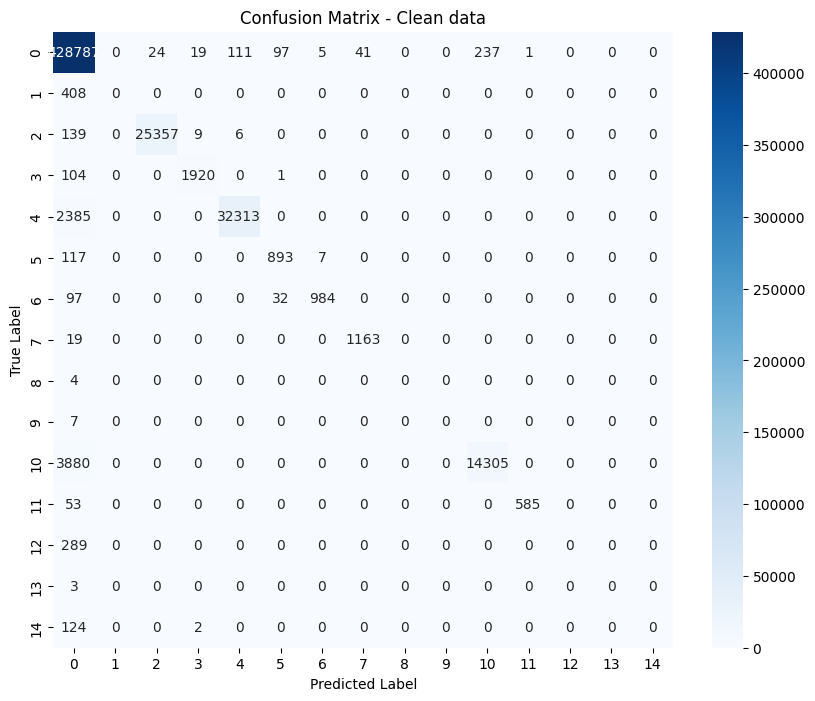

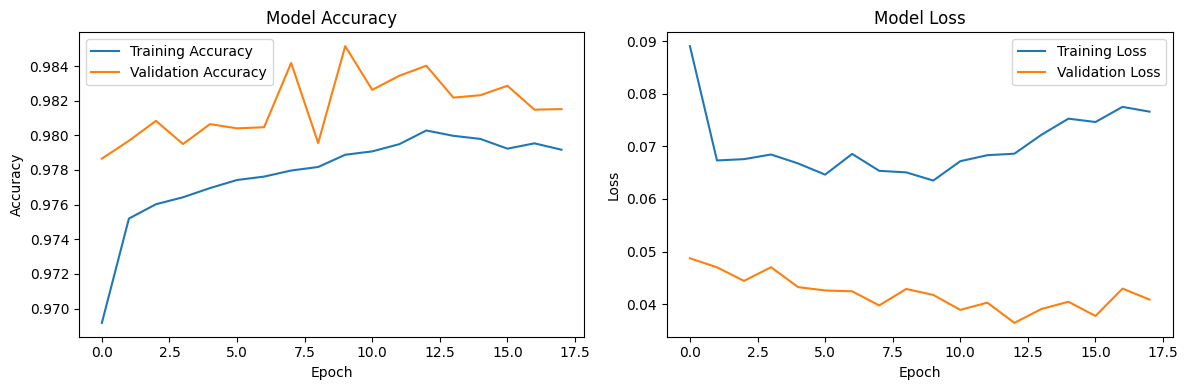

--- Final data 1 ---


/run/media/arzaca/Maxtor/Network-Anomaly-Detection/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
102906/102906 ━━━━━━━━━━━━━━━━━━━━ 84s 796us/step - accuracy: 0.9251 - loss: 0.2353 - val_accuracy: 0.9446 - val_loss: 0.1222
Epoch 2/50
102906/102906 ━━━━━━━━━━━━━━━━━━━━ 79s 769us/step - accuracy: 0.9442 - loss: 0.1682 - val_accuracy: 0.9588 - val_loss: 0.1263
Epoch 3/50
102906/102906 ━━━━━━━━━━━━━━━━━━━━ 80s 774us/step - accuracy: 0.9461 - loss: 0.1668 - val_accuracy: 0.9570 - val_loss: 0.1114
Epoch 4/50
102906/102906 ━━━━━━━━━━━━━━━━━━━━ 79s 769us/step - accuracy: 0.9461 - loss: 0.1549 - val_accuracy: 0.9463 - val_loss: 0.1338
Epoch 5/50
102906/102906 ━━━━━━━━━━━━━━━━━━━━ 80s 771us/step - accuracy: 0.9466 - loss: 0.1522 - val_accuracy: 0.9550 - val_loss: 0.1094
Epoch 6/50
102906/102906 ━━━━━━━━━━━━━━━━━━━━ 80s 772us/step - accuracy: 0.9489 - loss: 0.1656 - val_accuracy: 0.9529 - val_loss: 0.1202
Epoch 7/50
102906/102906 ━━━━━━━━━━━━━━━━━━━━ 79s 769us/step - accuracy: 0.9506 - loss: 0.2359 - val_accuracy: 0.9648 - val_loss: 0.0990
Epoch 8/50
102906/102906 ━━━━━━━━━━━━━━━━

/run/media/arzaca/Maxtor/Network-Anomaly-Detection/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/run/media/arzaca/Maxtor/Network-Anomaly-Detection/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/run/media/arzaca/Maxtor/Network-Anomaly-Detection/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    858235
           1       0.97      0.35      0.52       788
           2       0.99      1.00      0.99     51582
           3       0.98      0.65      0.78      4042
           4       1.00      0.90      0.95     69311
           5       0.97      0.17      0.29      2168
           6       0.93      0.33      0.49      2068
           7       0.78      0.66      0.72      2371
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00        13
          10       0.90      0.49      0.63     36371
          11       1.00      0.90      0.95      1253
          12       0.00      0.00      0.00       572
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00       270

    accuracy                           0.97   1029056
   macro avg       0.63      0.43      0.49   1029056
weighted avg       0.96   

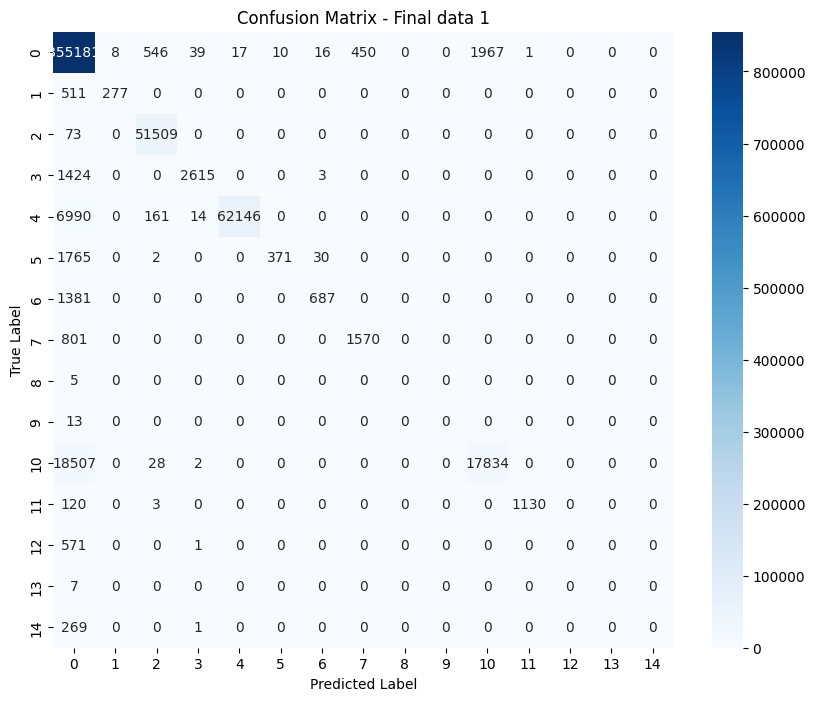

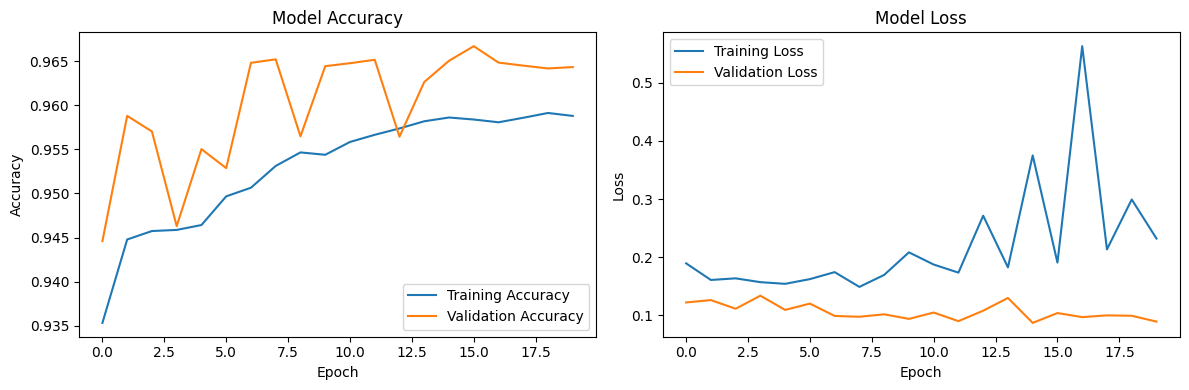

--- Final data 2 ---


/run/media/arzaca/Maxtor/Network-Anomaly-Detection/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
102906/102906 ━━━━━━━━━━━━━━━━━━━━ 86s 816us/step - accuracy: 0.9255 - loss: 0.2724 - val_accuracy: 0.9358 - val_loss: 0.2057
Epoch 2/50
102906/102906 ━━━━━━━━━━━━━━━━━━━━ 82s 794us/step - accuracy: 0.9308 - loss: 0.2228 - val_accuracy: 0.9459 - val_loss: 0.1941
Epoch 3/50
102906/102906 ━━━━━━━━━━━━━━━━━━━━ 82s 791us/step - accuracy: 0.9304 - loss: 0.2408 - val_accuracy: 0.9370 - val_loss: 0.1931
Epoch 4/50
102906/102906 ━━━━━━━━━━━━━━━━━━━━ 81s 790us/step - accuracy: 0.9330 - loss: 0.2366 - val_accuracy: 0.9284 - val_loss: 0.1995
Epoch 5/50
102906/102906 ━━━━━━━━━━━━━━━━━━━━ 82s 791us/step - accuracy: 0.9362 - loss: 0.2326 - val_accuracy: 0.9444 - val_loss: 0.2075
Epoch 6/50
102906/102906 ━━━━━━━━━━━━━━━━━━━━ 82s 793us/step - accuracy: 0.9331 - loss: 0.2695 - val_accuracy: 0.9377 - val_loss: 0.2010
Epoch 7/50
102906/102906 ━━━━━━━━━━━━━━━━━━━━ 82s 793us/step - accuracy: 0.9349 - loss: 0.2563 - val_accuracy: 0.9285 - val_loss: 0.1816
Epoch 8/50
102906/102906 ━━━━━━━━━━━━━━━━

/run/media/arzaca/Maxtor/Network-Anomaly-Detection/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/run/media/arzaca/Maxtor/Network-Anomaly-Detection/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/run/media/arzaca/Maxtor/Network-Anomaly-Detection/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    858235
           1       0.00      0.00      0.00       788
           2       0.96      1.00      0.98     51582
           3       0.91      0.24      0.38      4042
           4       0.97      0.90      0.93     69311
           5       0.00      0.00      0.00      2168
           6       1.00      0.32      0.49      2068
           7       0.00      0.00      0.00      2371
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00        13
          10       0.00      0.00      0.00     36371
          11       0.99      0.90      0.95      1253
          12       0.00      0.00      0.00       572
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00       270

    accuracy                           0.95   1029056
   macro avg       0.39      0.29      0.31   1029056
weighted avg       0.91   

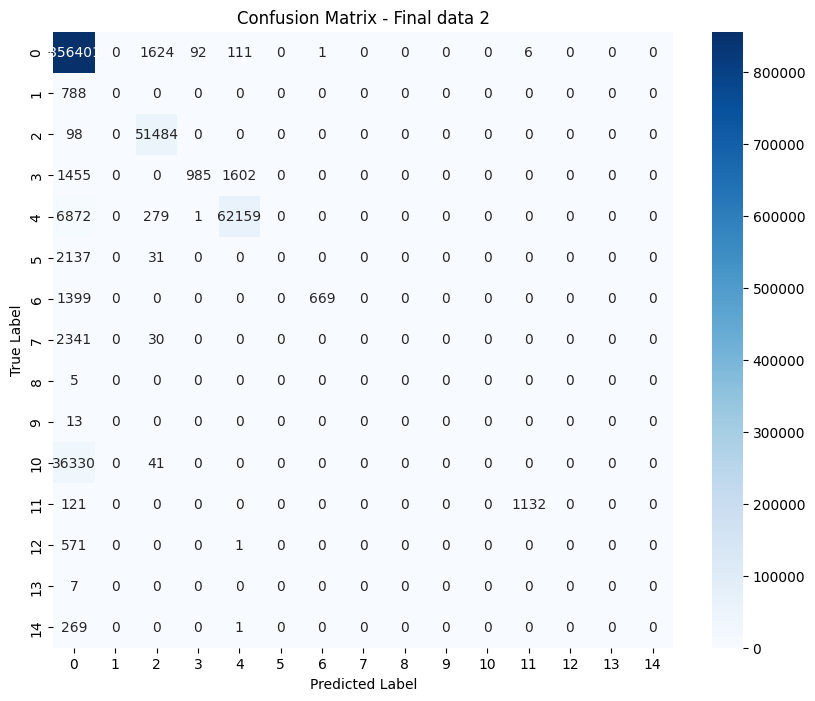

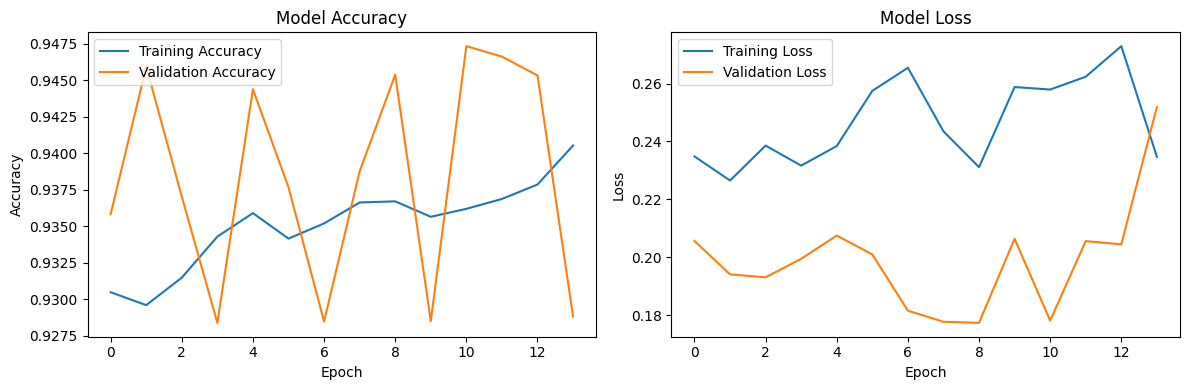

In [24]:
for name, (X_train, X_test, y_train, y_test) in processed_datasets.items():
    print(f'--- {name} ---')
    
    num_classes = len(np.unique(y_train))
    input_shape = X_train.shape[1]
    
    model = mlp_model(input_shape, num_classes)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    history = model.fit(X_train, y_train,
                        epochs=50,
                        batch_size=32,
                        validation_split=0.2,
                        callbacks=[early_stopping],
                        verbose=1)
    
    # Evaluating the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test accuracy: {accuracy:.4f}")
    
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    # Plotting
    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()